In [1]:
import numpy as np
from matplotlib import pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Initial Random Maze

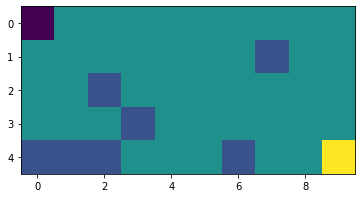

In [2]:
# create a new maze
def newMaze(seed=1234, height=5, width=10, prob=0.2):
    np.random.seed(seed)
    maze = (np.random.uniform(size=(height,width))>prob)*1
    maze[0,0] = -1
    maze[-1, -1] = 3
    plt.imshow(maze)
    plt.show()
    return maze, height, width

MAZE, height, width = newMaze()

# STEP 1

In [3]:
# move from current position to neighbour position
def left(posX,posY):
    return posX,posY-1

def right(posX,posY):
    return posX,posY+1

def up(posX,posY):
    return posX-1,posY

def down(posX,posY):
    return posX+1,posY

def direction(string, posX, posY):
    if string == 'D':
        return down(posX, posY)
    elif string == 'L':
        return left(posX, posY)
    elif string == 'R':
        return right(posX, posY)
    elif string == 'U':
        return up(posX, posY)

# used to add cases next to our current position to the end of to_do list
def case1(tab, maze, posX, posY, todo, current):
    if 'L' in tab and maze[left(posX,posY)]==1:
        maze[left(posX,posY)] = current+1
        todo.append(left(posX,posY))
    if 'R' in tab and maze[right(posX,posY)]==1:
        maze[right(posX,posY)] = current+1
        todo.append(right(posX,posY))
    if 'U' in tab and maze[up(posX,posY)]==1:
        maze[up(posX,posY)] = current+1
        todo.append(up(posX,posY))
    if 'D' in tab and maze[down(posX,posY)]==1:
        maze[down(posX,posY)] = current+1
        todo.append(down(posX,posY))
    return maze, todo

# complete the step 1
def step1(maze_c):
    maze = maze_c.copy()
    posX, posY = 0, 0
    todo = [(posX, posY)] # contains the position we still have to explore
    maze[posX,posY] = 0 
    maze[height-1,width-1] = 1
    
    # while there is still a cell to explore
    while len(todo)>0:
        posX, posY = todo.pop(0) # we explore the oldest value in todo
        current = maze[posX, posY]
        
        #PARTICULAR CELL:
        # adjacent to already processed 1's
        if((posX==1 and posY==1) or (posX==0 and posY==2) or (posX==2 and posY==0)):
            if(width>3 and maze[right(posX,posY)]==1):
                maze[right(posX,posY)] = current+1
                todo.append(right(posX,posY))
            if(height>3 and maze[down(posX,posY)]==1):
                maze[down(posX,posY)] = current+1
                todo.append(down(posX,posY)) 
        
        #CORNER CELLS:
        # on top-left corner
        elif(posY==0 and posX==0):
            maze, todo = case1(['R', 'D'], maze, posX, posY, todo, current)            
        # on top-right corner
        elif(posY==width-1 and posX==0):
            maze, todo = case1(['L', 'D'], maze, posX, posY, todo, current)         
        # on bottom-left corner
        elif(posY==0 and posX==height-1):
            maze, todo = case1(['R', 'U'], maze, posX, posY, todo, current)
        # on bottom-right corner
        elif(posY==width-1 and posX==height-1):
            continue       
        
        #FRONTIER CELLS:
        # on left frontier
        elif(posY==0):
            maze, todo = case1(['R', 'D', 'U'], maze, posX, posY, todo, current)        
        # on right frontier
        elif(posY==width-1):
            maze, todo = case1(['L', 'D', 'U'], maze, posX, posY, todo, current)         
        # on top frontier
        elif(posX==0):
            maze, todo = case1(['R', 'D', 'L'], maze, posX, posY, todo, current)       
        # on bottom frontier
        elif(posX==height-1):
            maze, todo = case1(['R', 'L', 'U'], maze, posX, posY, todo, current)
        
        #CENTRAL CELLS
        else:
            maze, todo = case1(['R', 'D', 'U', 'L'], maze, posX, posY, todo, current)
            
    return maze

In [4]:
MAZE1 = step1(MAZE)
print(MAZE1)

[[ 0  1  2  3  4  5  6  7  8  9]
 [ 1  2  3  4  5  6  7  0  9 10]
 [ 2  3  0  5  6  7  8  9 10 11]
 [ 3  4  5  0  7  8  9 10 11 12]
 [ 0  0  0  9  8  9  0 11 12 13]]


# STEP 2

In [5]:
# return one of possible next cells and update the final maze by replacing value of curent cell by -1
def nextPosition(tab, maze, maze_final, posX, posY):
    # get number corresponding to adjacent cells
    numbers = [maze[direction(d,posX,posY)] for d in tab]
    for i, nb in enumerate(numbers):
        # 1st part : optimal neigbour occurs when its value is less than the current one
        # 2nd part : due to conflicting zeros between depart and walls
        if nb+1==maze[posX,posY] and maze_final[direction(tab[i],posX,posY)]!=0:
            maze_final[posX, posY]=-1
            nextPos = direction(tab[i],posX,posY)
            return nextPos[0], nextPos[1], maze, maze_final
    
# complete the step 2
def step2(maze1_c, maze_final_c):
    maze1 = maze1_c.copy()
    maze_final = maze_final_c.copy()
    posX = height-1
    posY = width-1
    if(height>1 and width>1 and maze1[height-1,width-1]==1):
        print("The maze has no solution and I print it clearly!")
        return maze_final
    
    # while we are not in the top-left corner
    while(True):
        
        # CORNER CELLS:
        # on bottom-right corner
        if(posX==height-1 and posY==width-1):
            posX, posY, maze1, maze_final = nextPosition(['L', 'U'], maze1, maze_final, posX, posY)
        # on top-right corner
        elif(posY==width-1 and posX==0):  
            posX, posY, maze1, maze_final = nextPosition(['D', 'L'], maze1, maze_final, posX, posY) 
        # on bottom-left corner
        elif(posY==0 and posX==height-1):
            posX, posY, maze1, maze_final = nextPosition(['R', 'U'], maze1, maze_final, posX, posY) 
        # on top-left corner
        elif(posY==0 and posX==0):
            maze_final[0,0]=-1
            maze_final[height-1,width-1]=3
            plt.imshow(maze_final)
            plt.show()
            return maze_final
        
        # FRONTIER CELLS
        # on right frontier
        elif(posY==width-1):
            posX, posY, maze1, maze_final = nextPosition(['L', 'D', 'U'], maze1, maze_final, posX, posY)
        # on top frontier
        elif(posX==0):
            posX, posY, maze1, maze_final = nextPosition(['R', 'D', 'L'], maze1, maze_final, posX, posY)
        # on bottom frontier
        elif(posX==height-1):
            posX, posY, maze1, maze_final = nextPosition(['L', 'U', 'R'], maze1, maze_final, posX, posY)
        # on left frontier
        elif(posY==0):
            posX, posY, maze1, maze_final = nextPosition(['D', 'U', 'R'], maze1, maze_final, posX, posY)
        
        # CENTRAL CELLS
        else:
            posX, posY, maze1, maze_final = nextPosition(['L', 'D', 'U', 'R'], maze1, maze_final, posX, posY)
        

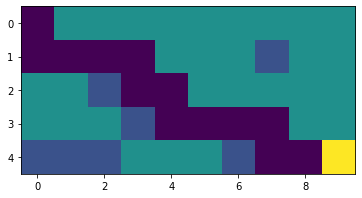

In [6]:
MAZE_FINAL = step2(MAZE1, MAZE)

Notice that we have not the same result than in the instruction since multiple ones are possible!

___
# Everything together

          Initial maze


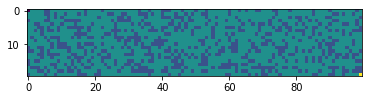

               ||
               ||
               \/

             STEP1:

 [[  0   1   2 ... 145   0 147]
 [  1   2   3 ...   0 145 146]
 [  2   3   4 ... 143 144   0]
 ...
 [  1   0   0 ... 138   0   0]
 [  1   1   1 ...   0   0   0]
 [  0   1   1 ... 140 141 142]] 

               ||
               ||
               \/

             STEP2:



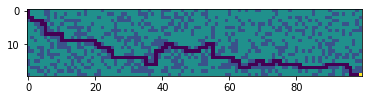

In [12]:
import sys
print("          Initial maze")
MAZE, height, width = newMaze(1234, 20, 100, 0.3)


if height+width<4:
    print('A maze should have more than one row or column ! ')
    sys.exit()
spaces = "            "
print(spaces,"  ||\n",spaces," ||\n",spaces," \/\n") 
MAZE1 = step1(MAZE)
print("             STEP1:\n\n", MAZE1,'\n')
print(spaces,"  ||\n",spaces," ||\n",spaces," \/\n") 
print("             STEP2:\n")
MAZE_FINAL = step2(MAZE1, MAZE)

In [8]:
b

NameError: name 'b' is not defined